In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

In [3]:
# Create optimus
from optimus import Optimus
op = Optimus(master="local[*]", app_name = "optimus" ,verbose =True, checkpoint= True)

Just check that Spark and all necessary environments vars are present...
-----
SPARK_HOME=C:\opt\spark\spark-2.3.1-bin-hadoop2.7
HADOOP_HOME=C:\opt\spark\spark-2.3.1-bin-hadoop2.7
You don't have PYSPARK_PYTHON set
You don't have PYSPARK_DRIVER_PYTHON set
JAVA_HOME=C:\Program Files\Java\jdk1.8.0_181
Pyarrow Installed
-----
Starting or getting SparkSession and SparkContext...

                             ____        __  _                     
                            / __ \____  / /_(_)___ ___  __  _______
                           / / / / __ \/ __/ / __ `__ \/ / / / ___/
                          / /_/ / /_/ / /_/ / / / / / / /_/ (__  ) 
                          \____/ .___/\__/_/_/ /_/ /_/\__,_/____/  
                              /_/                                  
                              
Transform and Roll out...
Setting checkpoint folder local. If you are in a cluster initialize Optimus with master='your_ip' as param
Deleting previous folder if exists...
Creating the

In [4]:
df = op.load.csv("data/Meteorite_Landings.csv")

In [5]:
df.table(10)

name 1 (string),id 2 (int),nametype 3 (string),recclass 4 (string),mass (g) 5 (double),fall 6 (string),year 7 (string),reclat 8 (double),reclong 9 (double),GeoLocation 10 (string)
Aachen,1,Valid,L5,21.0,Fell,01/01/1880⸱12:00:00⸱AM,50.775,6.08333,"(50.775000,⸱6.083330)"
Aarhus,2,Valid,H6,720.0,Fell,01/01/1951⸱12:00:00⸱AM,56.18333,10.23333,"(56.183330,⸱10.233330)"
Abee,6,Valid,EH4,107000.0,Fell,01/01/1952⸱12:00:00⸱AM,54.21667,-113.0,"(54.216670,⸱-113.000000)"
Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976⸱12:00:00⸱AM,16.88333,-99.9,"(16.883330,⸱-99.900000)"
Achiras,370,Valid,L6,780.0,Fell,01/01/1902⸱12:00:00⸱AM,-33.16667,-64.95,"(-33.166670,⸱-64.950000)"
Adhi⸱Kot,379,Valid,EH4,4239.0,Fell,01/01/1919⸱12:00:00⸱AM,32.1,71.8,"(32.100000,⸱71.800000)"
Adzhi-Bogdo⸱(stone),390,Valid,LL3-6,910.0,Fell,01/01/1949⸱12:00:00⸱AM,44.83333,95.16667,"(44.833330,⸱95.166670)"
Agen,392,Valid,H5,30000.0,Fell,01/01/1814⸱12:00:00⸱AM,44.21667,0.61667,"(44.216670,⸱0.616670)"
Aguada,398,Valid,L6,1620.0,Fell,01/01/1930⸱12:00:00⸱AM,-31.6,-65.23333,"(-31.600000,⸱-65.233330)"
Aguila⸱Blanca,417,Valid,L,1440.0,Fell,01/01/1920⸱12:00:00⸱AM,-30.86667,-64.55,"(-30.866670,⸱-64.550000)"


Processing column 'name'...
Using 'column_exp' to process column 'name_len' with function func_col_exp
Using 'column_exp' to process column 'name_len_buckets' with function _bucketizer
Processing column 'id'...
Using 'column_exp' to process column 'id_buckets' with function _bucketizer
Processing column 'nametype'...
Using 'column_exp' to process column 'nametype_len' with function func_col_exp
Using 'column_exp' to process column 'nametype_len_buckets' with function _bucketizer
Processing column 'recclass'...
Using 'column_exp' to process column 'recclass_len' with function func_col_exp
Using 'column_exp' to process column 'recclass_len_buckets' with function _bucketizer
Processing column 'mass (g)'...
Using 'column_exp' to process column 'mass (g)_buckets' with function _bucketizer
Processing column 'fall'...
Using 'column_exp' to process column 'fall_len' with function func_col_exp
Using 'column_exp' to process column 'fall_len_buckets' with function _bucketizer
Processing column 'y

Number of columns,10
Number of rows,45716
Total Missing (%),0.4891941552191793%
Total size in memory,97.1MiB
Categorical,5
Numeric,4
Date,1
Bool,
Not available,0
Distinct count,45515
Unique (%),99.56

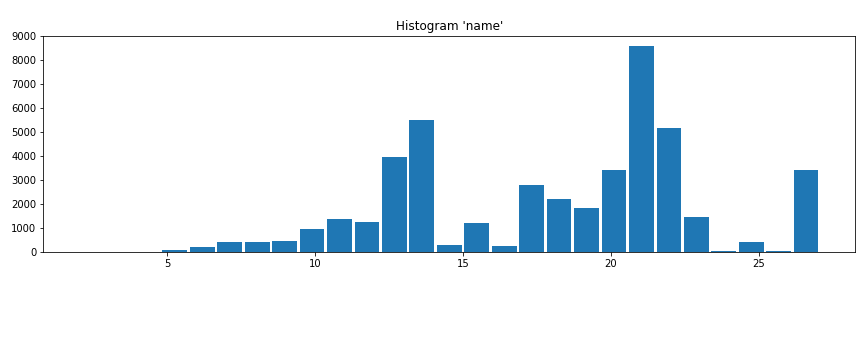
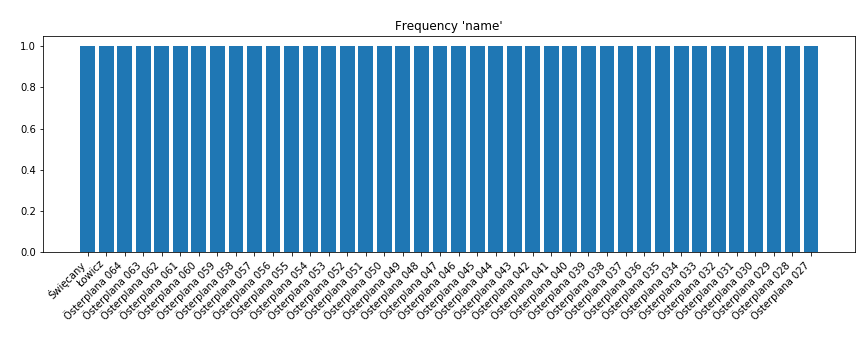
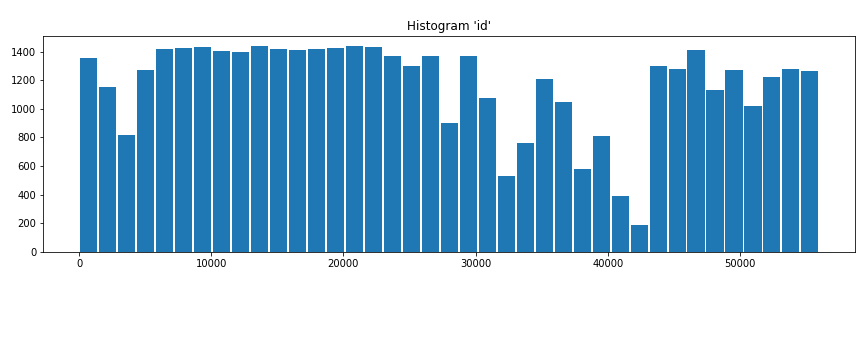
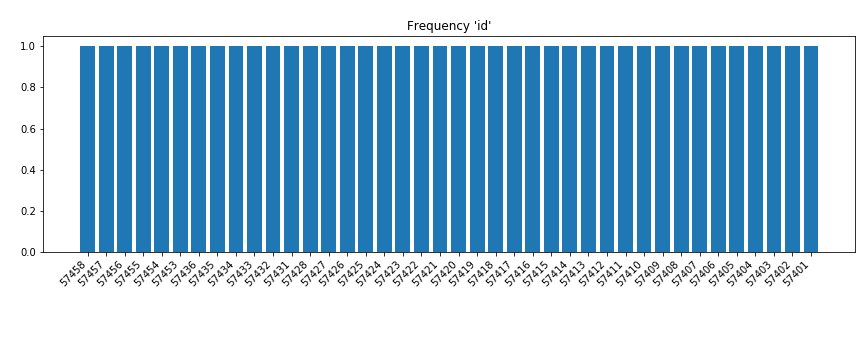
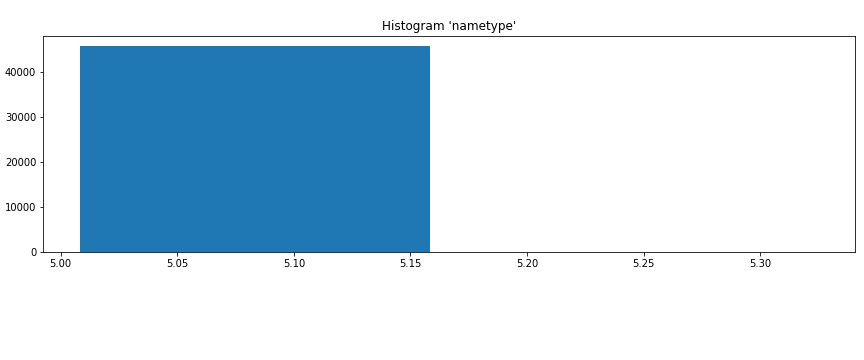
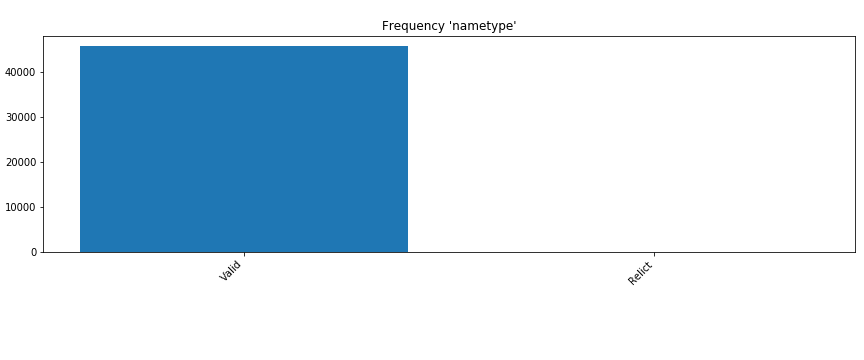
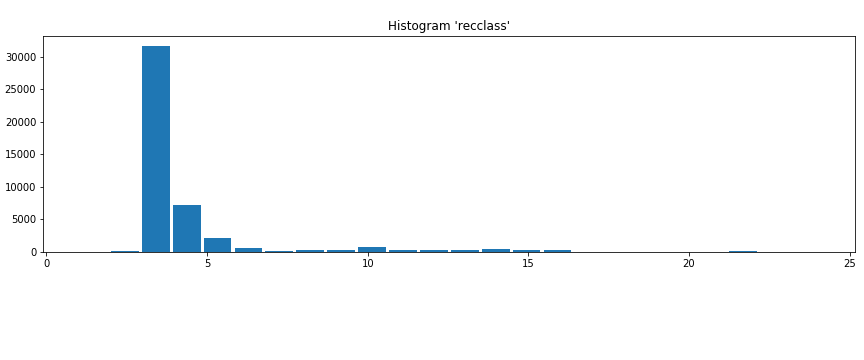
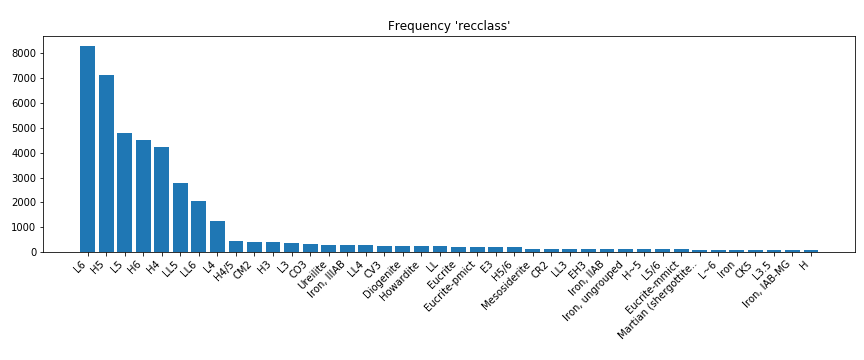
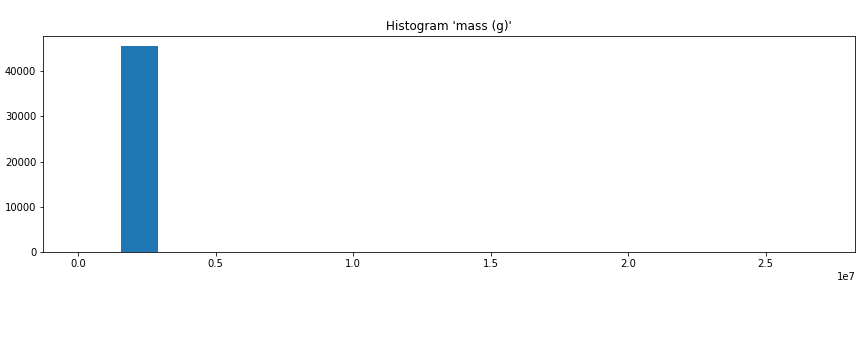
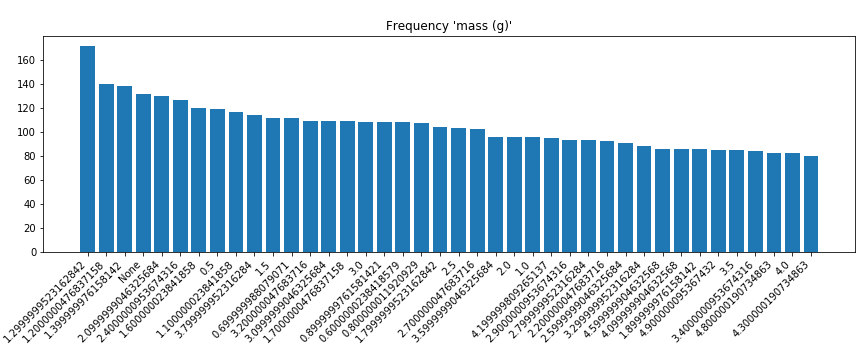
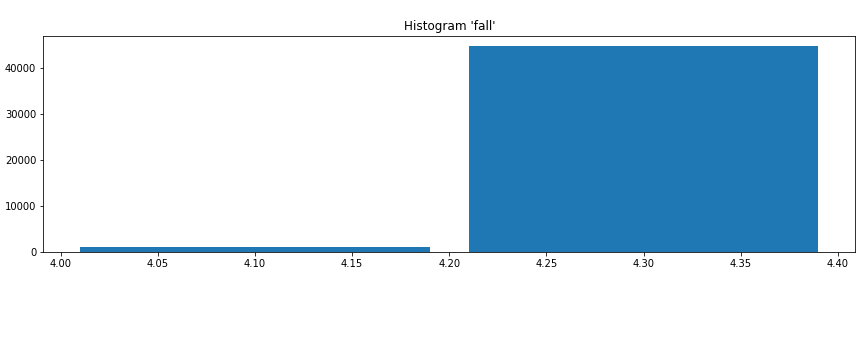
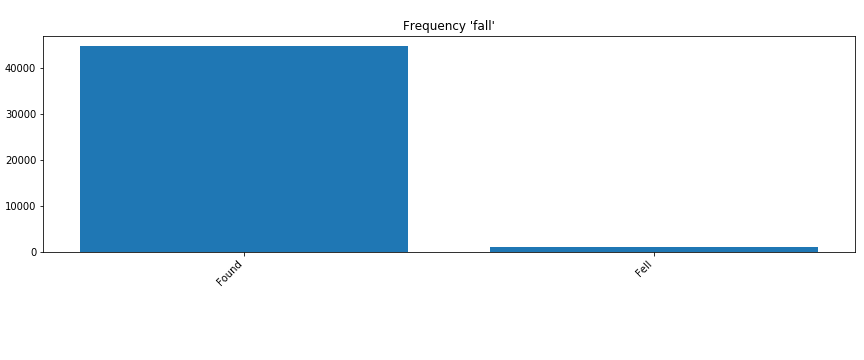
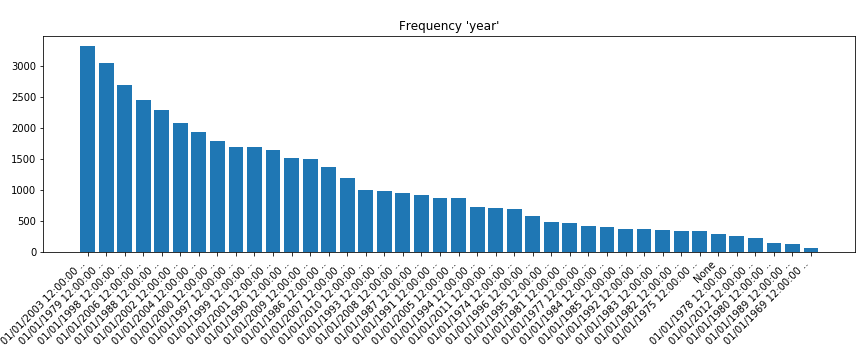
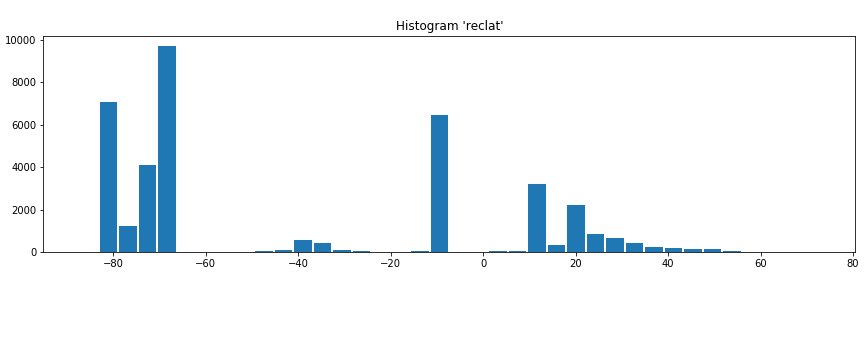
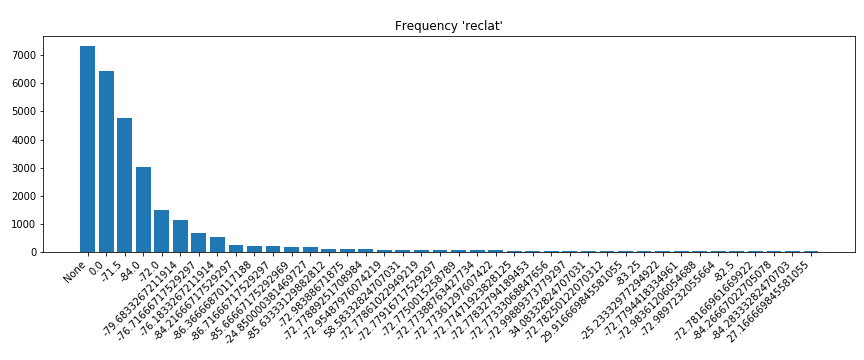
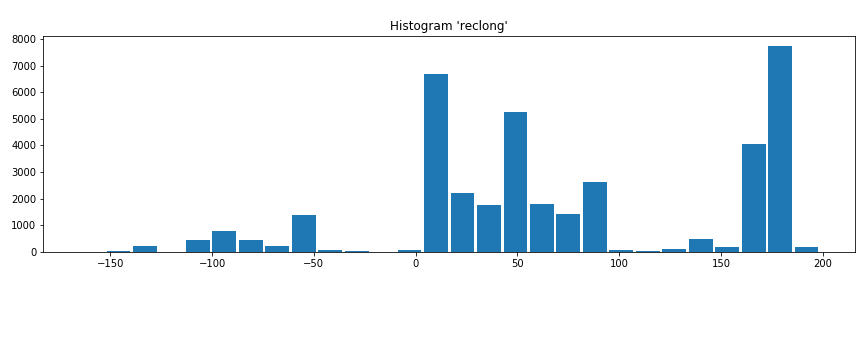
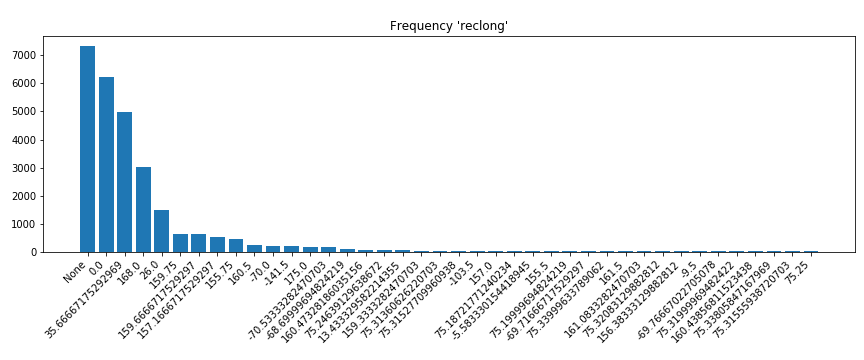
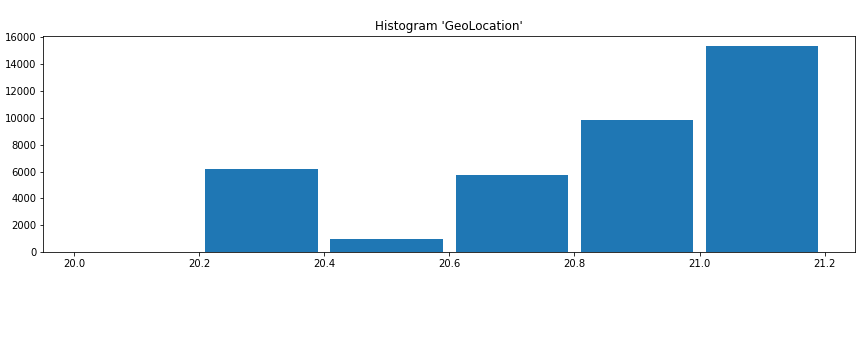
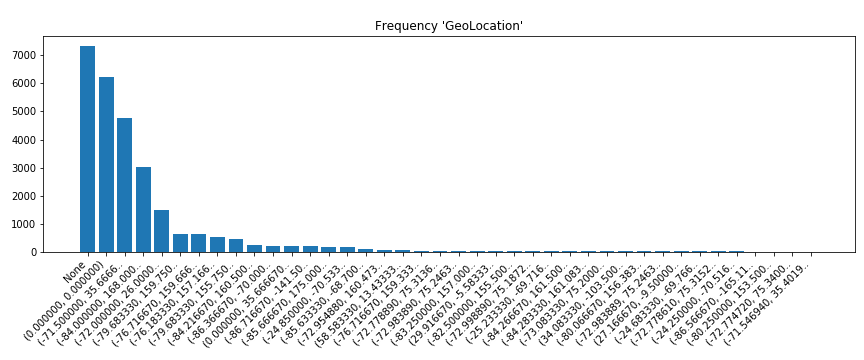

96.91748733512918

In [27]:
import timeit
start_time = timeit.default_timer()
#op.profiler.run(df, ["id","mass (g)", "reclat"])
op.profiler.run(df, "*")
timeit.default_timer() - start_time

In [65]:
a=[12,3,4,5,6]
len(a)
range(len(a))

range(0, 5)

### Plot profile for a specific column

In [ ]:
start_time = timeit.default_timer()
Profiler.columns(df, "reclat")
timeit.default_timer() - start_time

### Output a json file

### Plot histagram for multiple columns

Using 'column_exp' to process column 'id_buckets' with function _bucketizer
Using 'column_exp' to process column 'reclong_buckets' with function _bucketizer


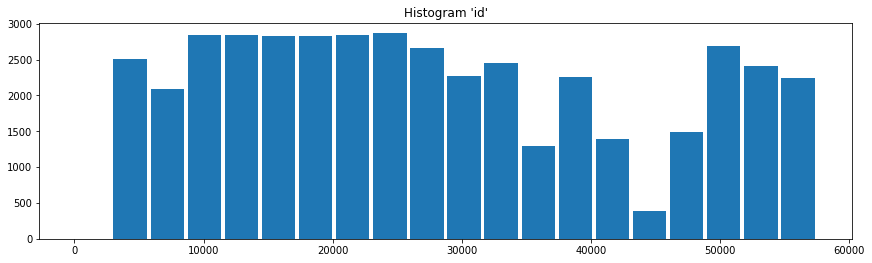

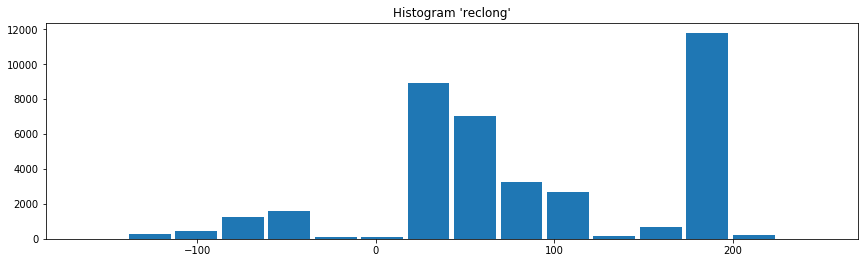

In [28]:
df.plots.hist(["id", "reclong"], 20)

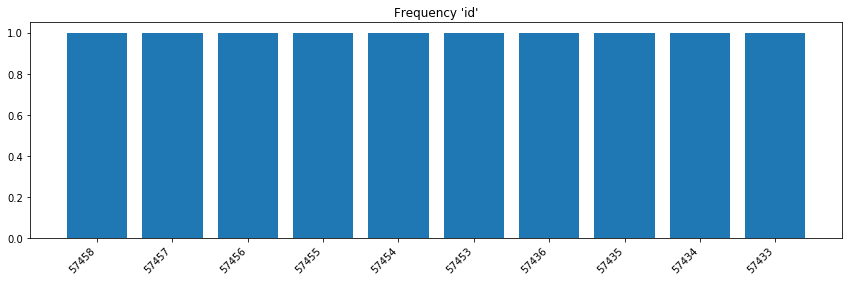

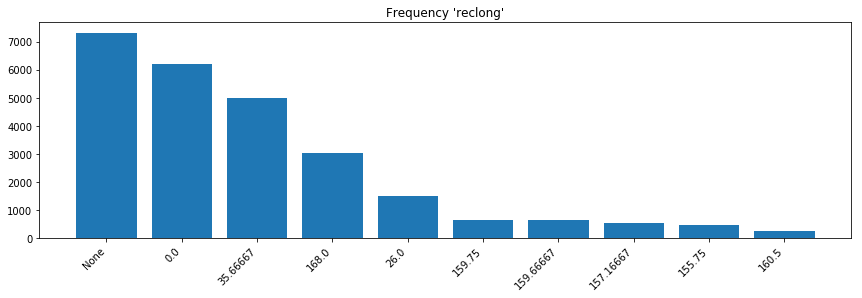

In [29]:
df.plots.frequency(["id", "reclong"], 10)

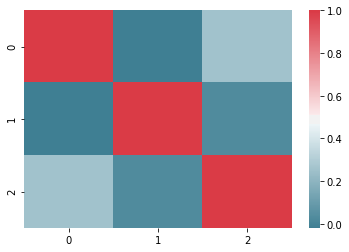

In [14]:
df.plots.correlation(["id","mass (g)", "reclat"])

In [19]:
df.correlation(["id","mass (g)", "reclat"], output="array")

array([[ 1.        , -0.01888518,  0.25706522],
       [-0.01888518,  1.        ,  0.02892697],
       [ 0.25706522,  0.02892697,  1.        ]])